In [6]:
import pandas as pd 
import numpy as np 
import os

In [7]:
df = pd.read_csv('final_dataset.csv')

In [54]:
df[['FatalInjuryCount',
       'SeriousInjuryCount', 'MinorInjuryCount']]


,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
1756,0.0,0.0,0.0
1757,0.0,0.0,0.0
1758,0.0,0.0,0.0
1759,0.0,0.0,0.0


In [60]:
acc_type = df.groupby(['UTC_YEAR'])[['SeriousInjuryCount','MinorInjuryCount','FatalInjuryCount']].sum().reset_index()

acc_type.rename(columns = {"UTC_YEAR":'Year'},inplace = True)

In [28]:
year_acc = df.groupby(['UTC_YEAR'])['NtsbNo'].count().reset_index()
year_acc.rename(columns = {"NtsbNo":"Acc_num", "UTC_YEAR":"Year"},inplace = True)

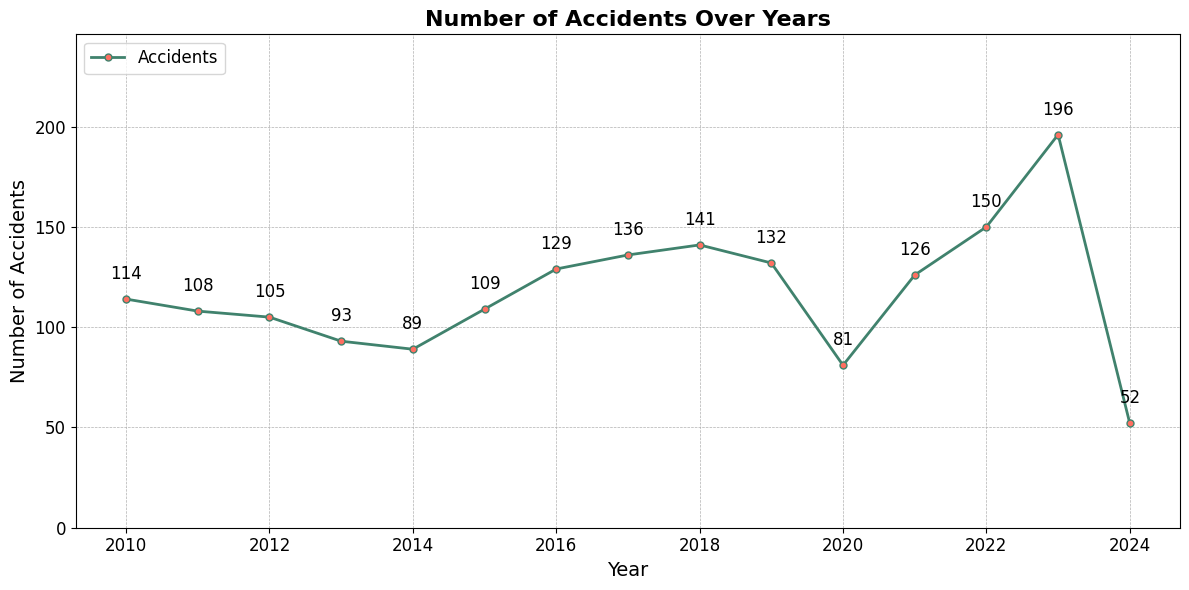

In [45]:
# Plotting the data
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(year_acc['Year'], year_acc['Acc_num'], marker='o', linestyle='-', color='#40826D', linewidth=2, markersize=5, markerfacecolor='#FF6F61')

# Adding titles and labels
plt.title('Number of Accidents Over Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)

plt.ylim(0,max(year_acc['Acc_num']) + 50)


# Customize grid
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add annotations
for i in range(len(year_acc)):
    plt.text(year_acc['Year'][i], year_acc['Acc_num'][i] + 10, year_acc['Acc_num'][i], ha='center', fontsize=12)


# Add legend
plt.legend(['Accidents'], loc='upper left', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

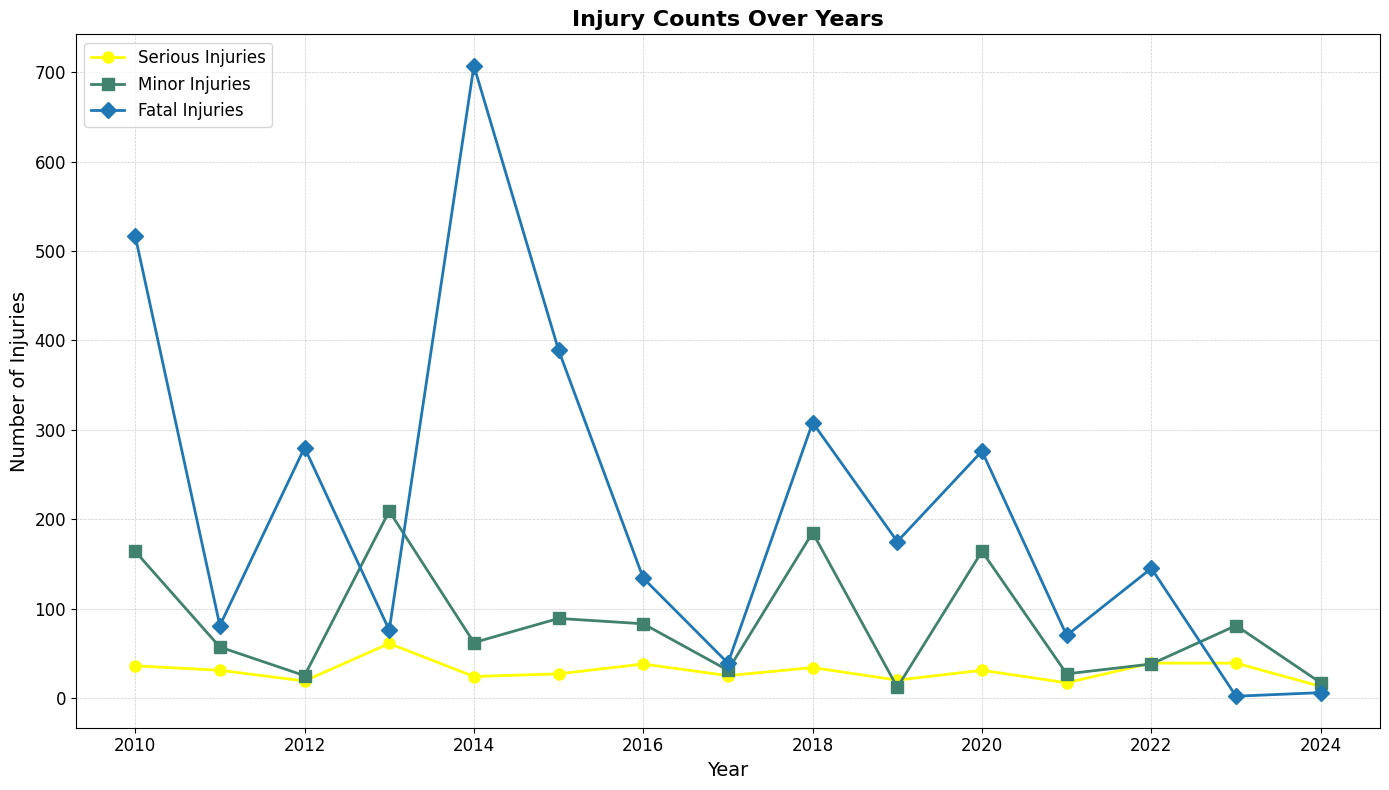

In [63]:
plt.figure(figsize=(14, 8))

# Plot each type of injury
plt.plot(acc_type['Year'], acc_type['SeriousInjuryCount'], marker='o', linestyle='-', color='yellow', linewidth=2, markersize=8, label='Serious Injuries')
plt.plot(acc_type['Year'], acc_type['MinorInjuryCount'], marker='s', linestyle='-', color='#40826D', linewidth=2, markersize=8, label='Minor Injuries')
plt.plot(acc_type['Year'], acc_type['FatalInjuryCount'], marker='D', linestyle='-', color='#1f77b4', linewidth=2, markersize=8, label='Fatal Injuries')

# Adding titles and labels
plt.title('Injury Counts Over Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Injuries', fontsize=14)

# Customize grid
plt.grid(which='both', linestyle='--', linewidth=0.5, color='#CCCCCC')

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(loc='upper left', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [68]:
df[(df['UTC_YEAR']== 2014) & (df['FatalInjuryCount'] > 0)][['NtsbNo','City','EventDate','FatalInjuryCount']]

,NtsbNo,City,EventDate,FatalInjuryCount
1635,DCA15WA046,Pangkalan Bun,2014-12-28T05:00:00Z,162.0
1640,CEN15WA108,Lake Siutghiol,2014-12-15T05:00:00Z,4.0
1680,DCA14RA127,Hrabove,2014-07-17T04:00:00Z,298.0
1697,WPR14FA182,Fairfield,2014-05-04T14:59:00Z,1.0
1703,ERA14WA186,Lujan,2014-03-29T20:00:00Z,1.0
1708,DCA14RA076,Kuala Lampur,2014-03-08T05:00:00Z,241.0
